In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

# QUESTION 1 PART (a)
LINEAR REGRESSION AND GRADIENT DESCENT 

In [45]:
#reading the data from files
X = pd.read_csv("DataX.dat", header=None, delim_whitespace=True)
Y = pd.read_csv("DataY.dat", header=None, delim_whitespace=True)

# zscore normalization
mean = X.mean()
std_dev = X.std()
X_standardized = (X - mean) / std_dev

# converting to numpy arrays
X = np.array(X_standardized)
Y = np.array(Y)
m = len(Y)

# adding a column of ones for the biased term
ones = np.ones((m, 1))
X = np.hstack((ones, X))
theta = np.zeros((X.shape[1], 1))

/var/folders/dz/tmzcb2_j20bbp4pjqn9xwlvw0000gn/T/ipykernel_2471/235432633.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv("DataX.dat", header=None, delim_whitespace=True)
/var/folders/dz/tmzcb2_j20bbp4pjqn9xwlvw0000gn/T/ipykernel_2471/235432633.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Y = pd.read_csv("DataY.dat", header=None, delim_whitespace=True)


In [46]:
#using the root mean square error as the cost function
def hypothesis(X,theta):
    return np.dot(X,theta)

def cost_function(X, Y, theta):
    h=hypothesis(X, theta)
    rmse=np.sqrt((1/(2*m))* np.sum(np.square(h-Y)))
    return rmse

In [47]:
# using gradient descent to minimize cost function
def gradient_descent(X,Y,theta,alpha,iterations):
    for i in range(iterations):
        h=hypothesis(X, theta)
        theta=theta-(alpha/m)*np.dot(X.T, (h-Y))
    return theta

theta=gradient_descent(X, Y,theta, alpha=0.02,iterations=5000).flatten()
rmse=cost_function(X, Y, theta)

print("RMSE:",rmse)
print("values of the regression coefficients:\n",theta)


RMSE: 798712.5732564674
values of the regression coefficients:
 [335373.9        101949.0824904   37523.22660679 -39401.28074583]


In [48]:
def predictions(X, theta):
    return X.dot(theta)

predicted_prices = predictions(X, theta)
print("Predicted house prices:")
for i, price in enumerate(predicted_prices, 1):
    print(f"House {i}: {price:.2f}")


Predicted house prices:
House 1: 350436.46
House 2: 286026.11
House 3: 388264.76
House 4: 272289.37
House 5: 455165.60
House 6: 325450.31
House 7: 277591.42
House 8: 263917.00
House 9: 257910.48
House 10: 272479.49
House 11: 319699.39
House 12: 337145.44
House 13: 323087.62
House 14: 694865.11
House 15: 243597.07
House 16: 365706.78
House 17: 260020.73
House 18: 239507.53
House 19: 405196.46
House 20: 459127.35
House 21: 307368.43
House 22: 332610.17
House 23: 286537.31
House 24: 322510.95
House 25: 578684.25
House 26: 222126.96
House 27: 267878.75
House 28: 404367.35
House 29: 362705.10
House 30: 418552.96
House 31: 326348.06
House 32: 168311.67
House 33: 332479.22
House 34: 482452.12
House 35: 303213.41
House 36: 265194.99
House 37: 239890.92
House 38: 344236.67
House 39: 610440.55
House 40: 348070.62
House 41: 303983.35
House 42: 367561.44
House 43: 399828.93
House 44: 234906.79
House 45: 200211.12
House 46: 308453.14
House 47: 235290.18
House 48: 187877.01
House 49: 446029.60
House

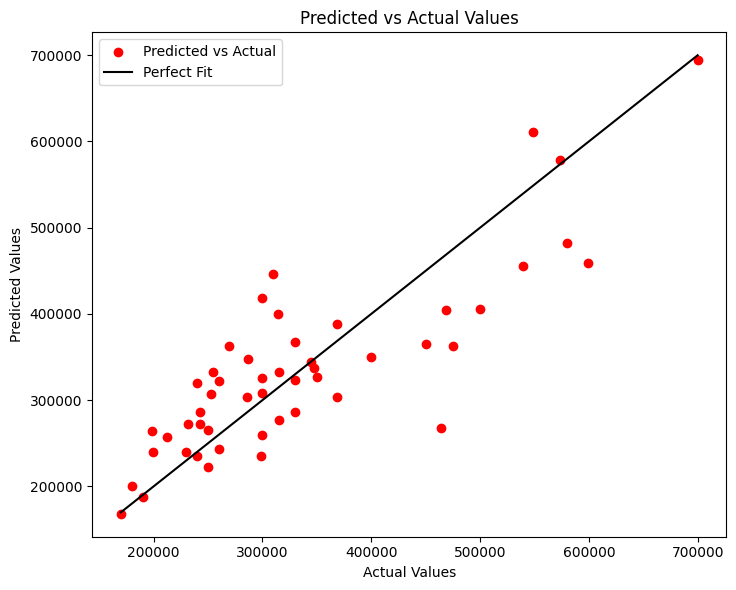

In [49]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.scatter(Y, predicted_prices, color='red', label='Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='black', linestyle='-', label='Perfect Fit')
plt.legend()

plt.tight_layout()
plt.show()


# PART (b)

In [50]:
# same preprocessing as in part (a)
X = pd.read_csv("DataX.dat", header=None, delim_whitespace=True)
Y = pd.read_csv("DataY.dat", header=None, delim_whitespace=True)

mean = X.mean()
std_dev = X.std()
X_standardized = (X - mean) / std_dev

X = np.array(X_standardized)
Y = np.array(Y)
m = len(Y)

ones = np.ones((m, 1))
X = np.hstack((ones, X))

/var/folders/dz/tmzcb2_j20bbp4pjqn9xwlvw0000gn/T/ipykernel_2471/2109178922.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv("DataX.dat", header=None, delim_whitespace=True)
/var/folders/dz/tmzcb2_j20bbp4pjqn9xwlvw0000gn/T/ipykernel_2471/2109178922.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Y = pd.read_csv("DataY.dat", header=None, delim_whitespace=True)


In [51]:
# closed form solution formulae for theta
theta_closed_form = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
Y_pred = X.dot(theta_closed_form)

def cost_function(X, Y, theta):
    h = X.dot(theta)
    cost = (1 / (2 * len(Y))) * np.sum(np.square(h - Y))
    rmse = np.sqrt(cost)
    return rmse

cost = cost_function(X, Y, theta_closed_form)
print("cost from closed-form solution:", cost)

cost from closed-form solution: 46570.328877034735


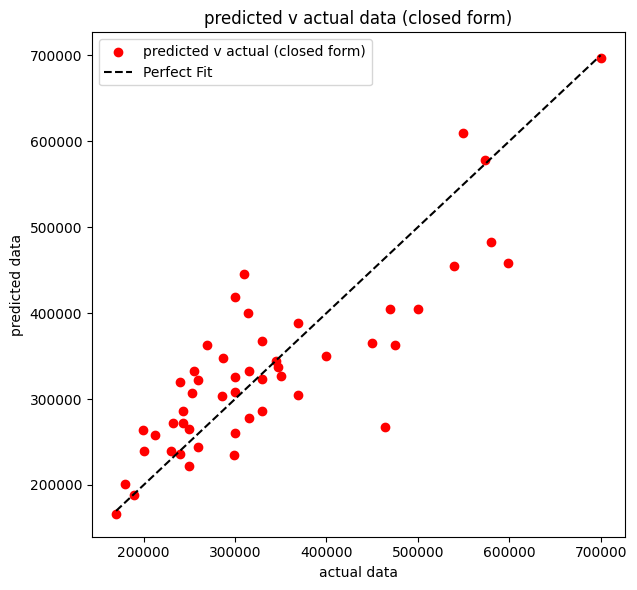

In [52]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.scatter(Y, Y_pred, color='red', label='predicted v actual (closed form)')
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.title('predicted v actual data (closed form)')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='black', linestyle='--', label='Perfect Fit')
plt.legend()
plt.tight_layout()
plt.show()

# QUESTION NO 2 (LOGISTIC REGRESSION)

In [71]:
#below steps are invloved in the code 
#sigmoid function (to get the probability)
# cost function of logistic regression
# gradient function
# logistic regression function
# predict function
# z_score function
# normalizing the data  
# converting to numpy arrays
# adding a column of ones

import numpy as np
import pandas as pd

X = pd.read_csv("DataX.dat", header=None, delim_whitespace=True)
Y = pd.read_csv("ClassY.dat", header=None, delim_whitespace=True)


/var/folders/dz/tmzcb2_j20bbp4pjqn9xwlvw0000gn/T/ipykernel_2471/1548239800.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv("DataX.dat", header=None, delim_whitespace=True)
/var/folders/dz/tmzcb2_j20bbp4pjqn9xwlvw0000gn/T/ipykernel_2471/1548239800.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Y = pd.read_csv("ClassY.dat", header=None, delim_whitespace=True)


In [72]:
def normalization(x):
    return (x - np.mean(x)) / np.std(x)

In [74]:
X_standardized = X.copy()
X_standardized = X_standardized.apply(normalization)

In [75]:
X = np.array(X_standardized)
Y = np.array(Y).ravel()
X = np.c_[np.ones(X.shape[0]), X]

In [76]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1/(1 + np.exp(-z))

In [77]:
def cost(X, y, theta):
    m = X.shape[0]
    z = np.dot(X, theta)
    h = sigmoid(z)
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    return -(1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))

In [78]:
def gradient(X, y, theta):
    m = X.shape[0]
    z = np.dot(X, theta)
    h = sigmoid(z)
    return (1/m) * np.dot(X.T, (h-y))

In [79]:
def logistic_regression(X, y, alpha=0.01, iterations=1000):
    theta = np.zeros(X.shape[1])
    m = X.shape[0]
    for i in range(iterations):
        theta = theta - alpha * gradient(X, y, theta)
    
    return theta

In [80]:
def predict(X, theta):
    probabilities = sigmoid(np.dot(X, theta))
    return (probabilities >= 0.5).astype(int)

In [81]:
theta = logistic_regression(X, Y)
predictions = predict(X, theta)


In [82]:
preds_df = pd.DataFrame(predictions, columns=['predicted class'])
actual_df = pd.DataFrame(Y, columns=['actual class'])

In [83]:
preds_df = pd.DataFrame(predictions, columns=['predicted class'])
actual_df = pd.DataFrame(Y, columns=['actual class'])

In [85]:
result = pd.concat([actual_df, preds_df], axis=1)
result

,actual class,predicted class
0,1,1
1,1,1
2,1,1
3,0,1
4,1,0
5,0,0
6,1,1
7,0,1
8,1,1
9,1,1
